In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils, plot_help


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, \
                            roc_curve, roc_auc_score, precision_recall_curve

from joblib import dump, load

%matplotlib inline

In [2]:
#change read limit to -1 to load entire dataframe
df = utils.chunk_loader('data/cleaned/business_merge_feats.csv', read_limit=-1)

df_num = utils.make_num_df(df)

#drop columns from feature importance permutation
drop_col = ['gluten_free', 'dairy_free', 'Spas', 'Hair', 'road_type', 'asian',
            'perms', 'vegan', 'Health', 'kosher', 'halal', 'soy_free', 'vegetarian',
            'AgesAllowed', 'Beauty', 'curly', 'kids', 'thursday', 'africanamerican',
            'dessert', 'intimate', 'romantic', 'valet', 'validated', 'HasTV',
            'brunch', 'RestaurantsCounterService', 'hipster', 'Open24Hours', 'BYOB',
            'Corkage', 'DogsAllowed', 'BusinessAcceptsBitcoin', 'CoatCheck',
            'classy', 'divey', 'extensions', 'monday', 'coloring', 'straightperms',
            'sunday', 'GoodForDancing', 'wednesday', 'tuesday', 'karaoke',
            'touristy', 'video', 'jukebox', 'background_music', 'dj', 'upscale',
            'trendy', 'no_music']
#drop cols
df_num = df_num.drop(labels=drop_col, axis=1)

In [3]:
df_num.shape

(161160, 49)

In [4]:
df_num.head()

,review_count,stars,GoodForKids,RestaurantsReservations,Caters,RestaurantsTableService,RestaurantsTakeOut,RestaurantsPriceRange2,OutdoorSeating,BikeParking,...,Bars,Medical,cool_change,funny_change,stars_change,useful,avg_month_checkin,span_checkin,median_income,is_open
0,5,3.0,0,0,0,0,0,0,0,0,...,0,0,0.000000,0.00000,0.000000,0.000000,1.777778,5323,3.5,0
1,128,2.5,1,1,1,1,1,2,0,0,...,0,0,-0.042484,-0.04902,-0.075163,-0.156863,36.083333,15143,3.0,1
2,170,4.0,1,1,0,1,1,2,0,1,...,1,0,-0.110000,-0.19000,0.055000,-0.215000,57.083333,58518,3.5,1
3,3,5.0,0,0,0,0,0,0,0,0,...,0,0,0.000000,0.00000,0.000000,-0.500000,1.222222,8464,3.5,1
4,3,2.5,0,0,0,0,0,2,0,0,...,0,0,0.000000,0.00000,0.000000,0.000000,1.000000,2971,3.0,1


In [5]:
X_train, X_test, y_train, y_test = utils.train_test_scale (df_num, 
                                                           'is_open', 
                                                           random_state=None)

In [6]:
param_grid = {'criterion': ['gini'], 
              'n_estimators': [300], 
              'n_jobs': [-1],
              'max_depth':[3, 9, 15],
              'min_samples_split': [2, 4, 8],
              'min_samples_leaf': [1, 5, 15],
             }

#instantiate logistic regression
rf = RandomForestClassifier()

#instantite grid search
rf_cv = GridSearchCV(rf, param_grid, cv=4, n_jobs=-1, scoring='roc_auc', verbose=10)
#fit to training data
rf_cv.fit(X_train, y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 34.3min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [7]:
#see best combo
print(rf_cv.best_params_ )

print(rf_cv.best_score_)

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300, 'n_jobs': -1}
0.794403204587721


              precision    recall  f1-score   support

           0       0.80      0.22      0.35      6072
           1       0.85      0.99      0.91     26160

    accuracy                           0.84     32232
   macro avg       0.82      0.60      0.63     32232
weighted avg       0.84      0.84      0.80     32232

--------------------------------------------------
Normalized confusion matrix


/Users/nadimkawwa/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


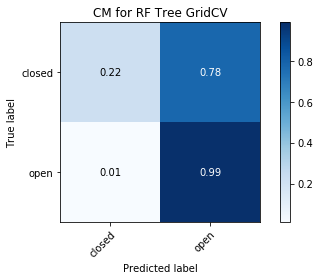

--------------------------------------------------


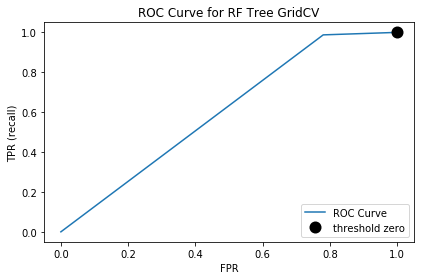

Area Under Curve = 0.6038
--------------------------------------------------


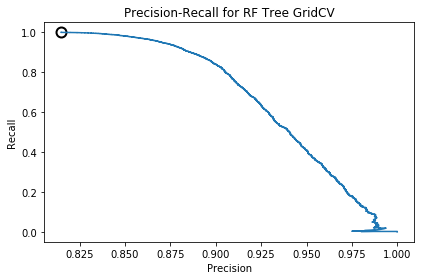

In [8]:
#make pred
y_pred = rf_cv.predict(X_test)

print(classification_report(y_test, y_pred))
print(50*'-')
plot_help.plot_confusion_matrix(y_test, y_pred, ['closed', 'open'], normalize=True,
                                title='RF Tree GridCV')
print(50*'-')
plot_help.plot_roc_curve(y_test, y_pred, 'RF Tree GridCV')
print(50*'-')
plot_help.plot_prc_curve(y_test, rf_cv.predict_proba(X_test)[:, 1], 'RF Tree GridCV')